In [1]:
# importing the all the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset to be solved
df= pd.read_csv(r'C:\Users\pavan\OneDrive\Documents\question papers upsc\loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Displaying the top five rows using head keyword
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# all the columns of data
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the dataset. 

In [6]:
# types of features
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# printing the shape of dataset
df.shape

(614, 13)

We will first look at the target variable, i.e., Loan_Status.

As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.



In [8]:
#df["Loan_Status"].size
df["Loan_Status"].count()

614

In [9]:
# printing tha loan status
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Loan_Status'}>

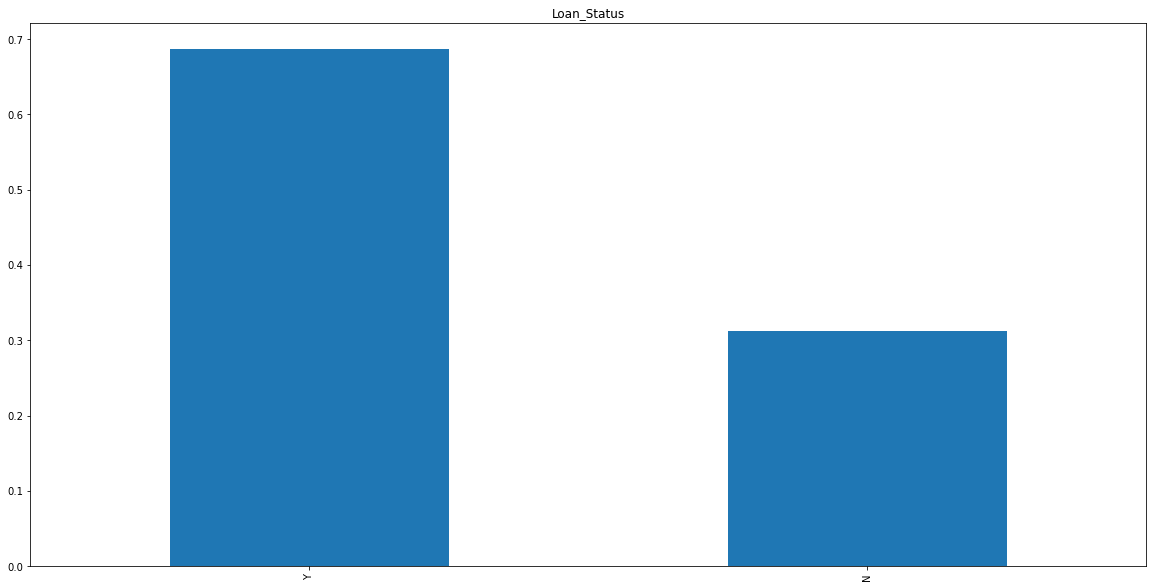

In [10]:
df["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

In [11]:
# printing the gender counts
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

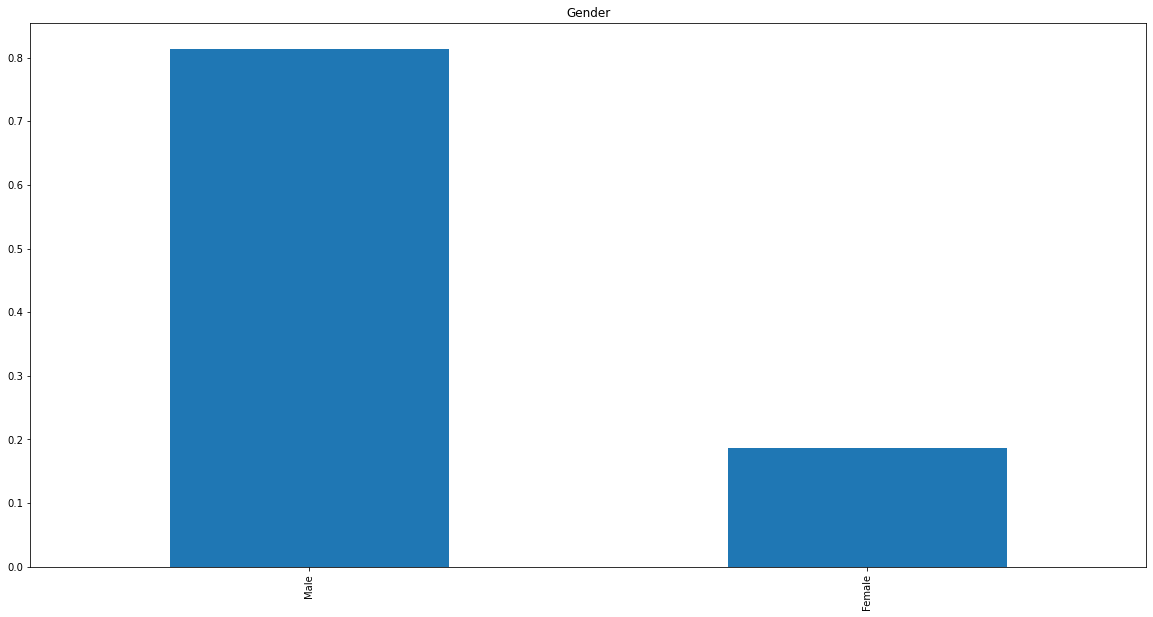

In [12]:
# plotting bar plot of gender
df['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

In our dataset the "Gender" variable contain Male : 81% Female: 19%

In [14]:
# printing the married counts
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:title={'center':'Married'}>

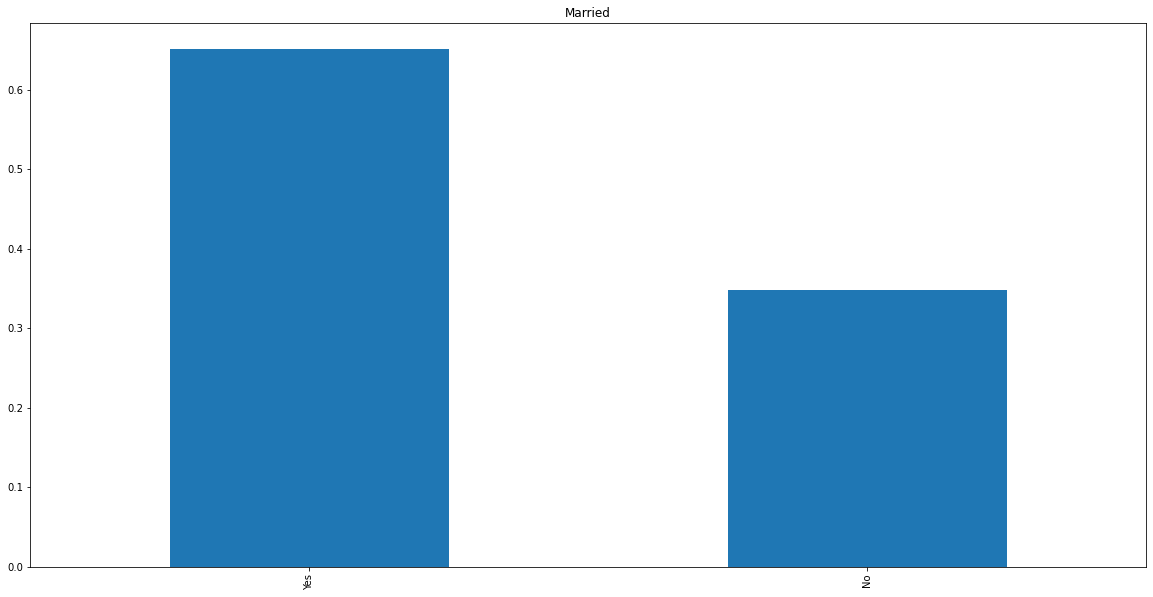

In [15]:
# plotting bar plot of married
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

From the Grapch we see that :

Number of married people : 65%

Number of unmarried people : 35%

In [16]:
# printing the self employed counts
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:title={'center':'Self_Employed'}>

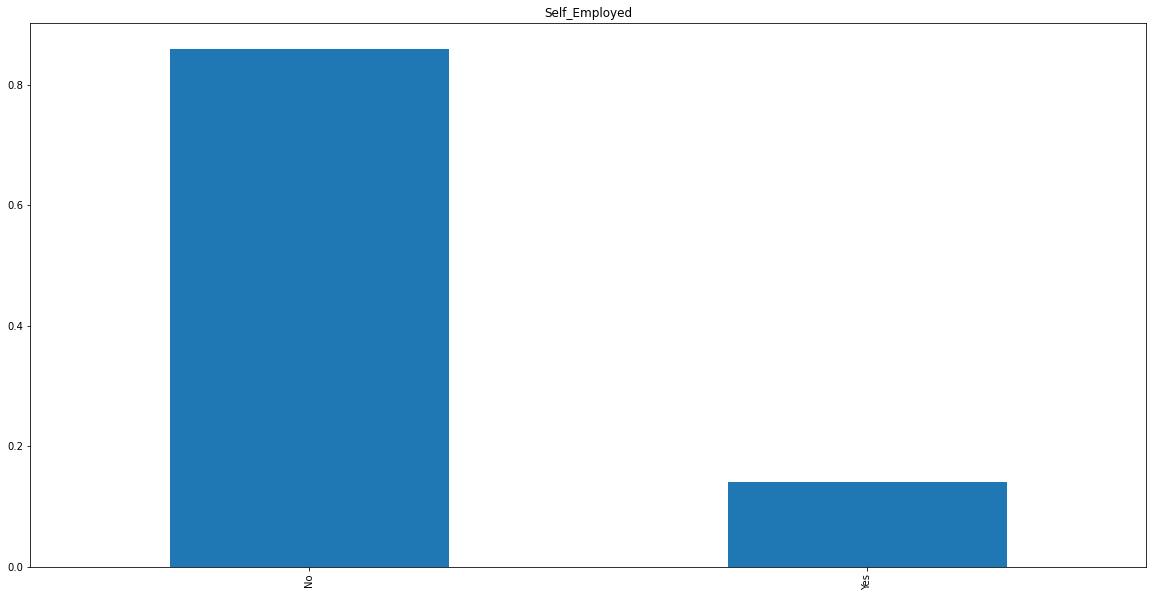

In [17]:
# plotting bar plot of self employed
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')

Among 582 people only 14% are Self_Employed and rest of the 86% are Not_Self_Employed

In [18]:
# printing the credit history counts
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:title={'center':'Credit_History'}>

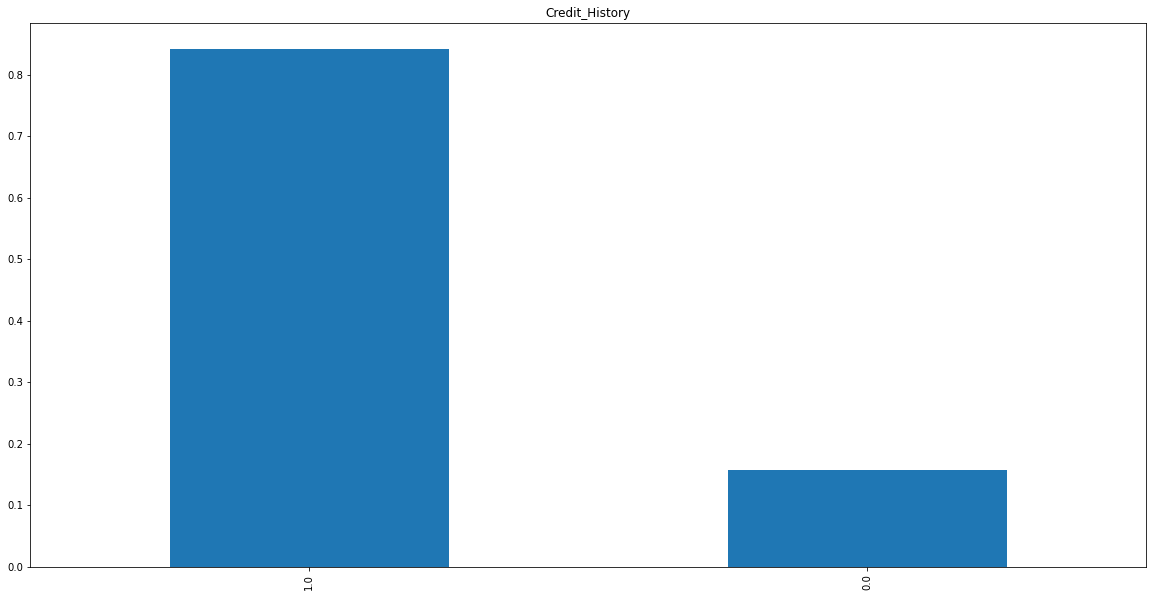

In [19]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

Around 84% applicants have repaid their debts.

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

In [20]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:title={'center':'Dependents'}>

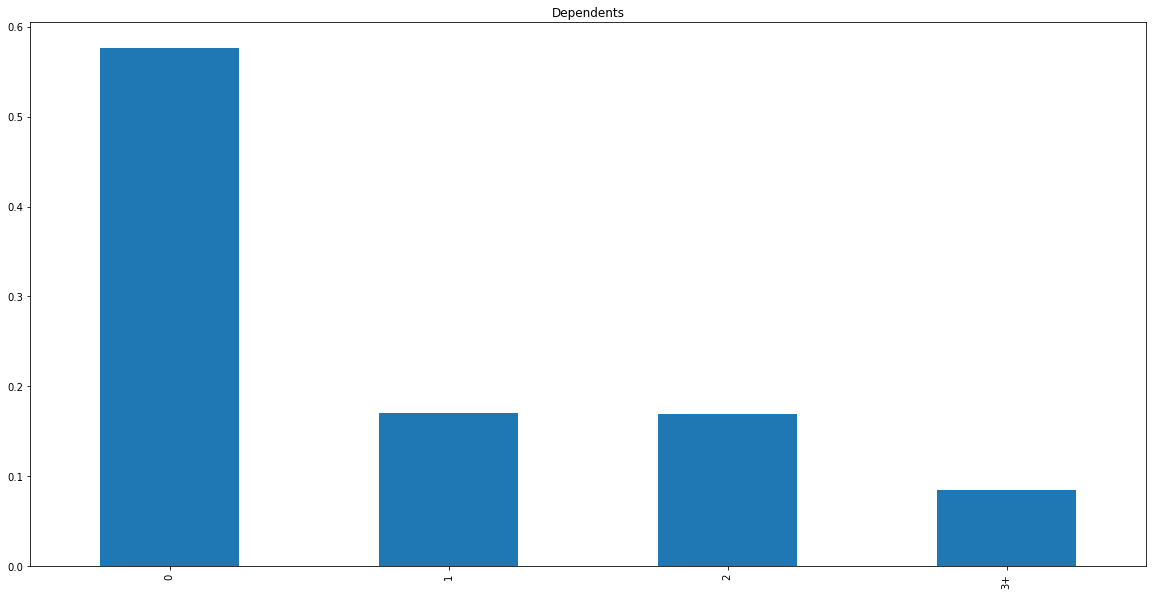

In [21]:
df['Dependents'].value_counts(normalize=True).plot.bar(title="Dependents")

58% people have 0 dependent

17% people have 1 dependent

17% people have 2 dependent

8% people have 3+ dependent

In [22]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:title={'center':'Education'}>

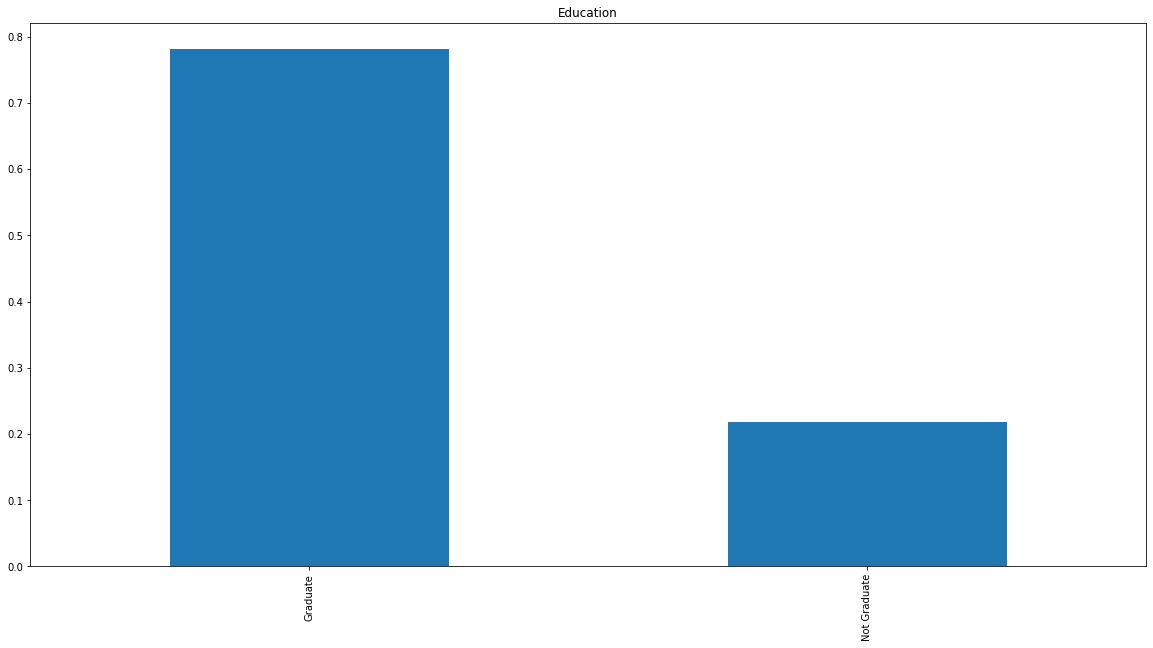

In [23]:
df["Education"].value_counts(normalize=True).plot.bar(title = "Education")

Total number of People : 614

78% are Graduated and 22% are not Graduated



In [24]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:title={'center':'Property_Area'}>

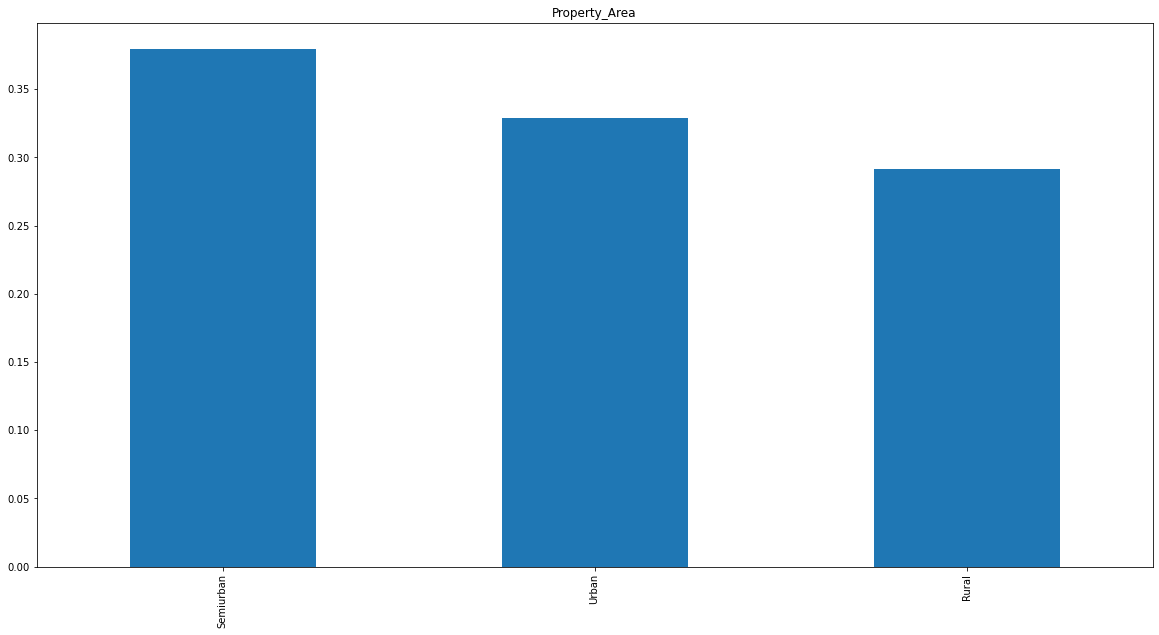

In [25]:
df["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")

38% people from Semiurban area

33% people from Urban area

29% people from Rural area

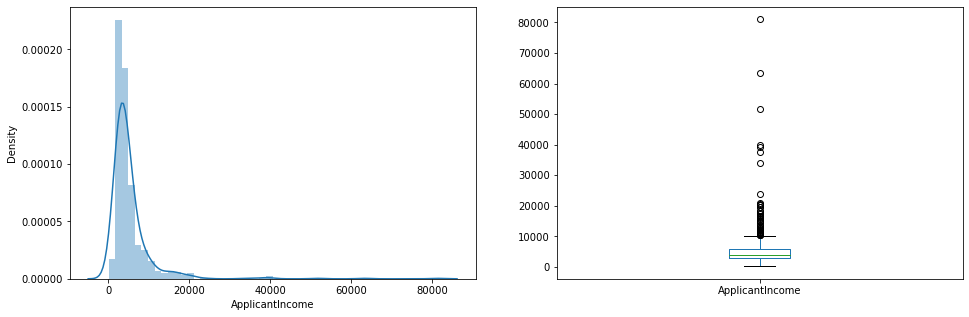

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["ApplicantIncome"]);

plt.subplot(122)
df["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()


It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

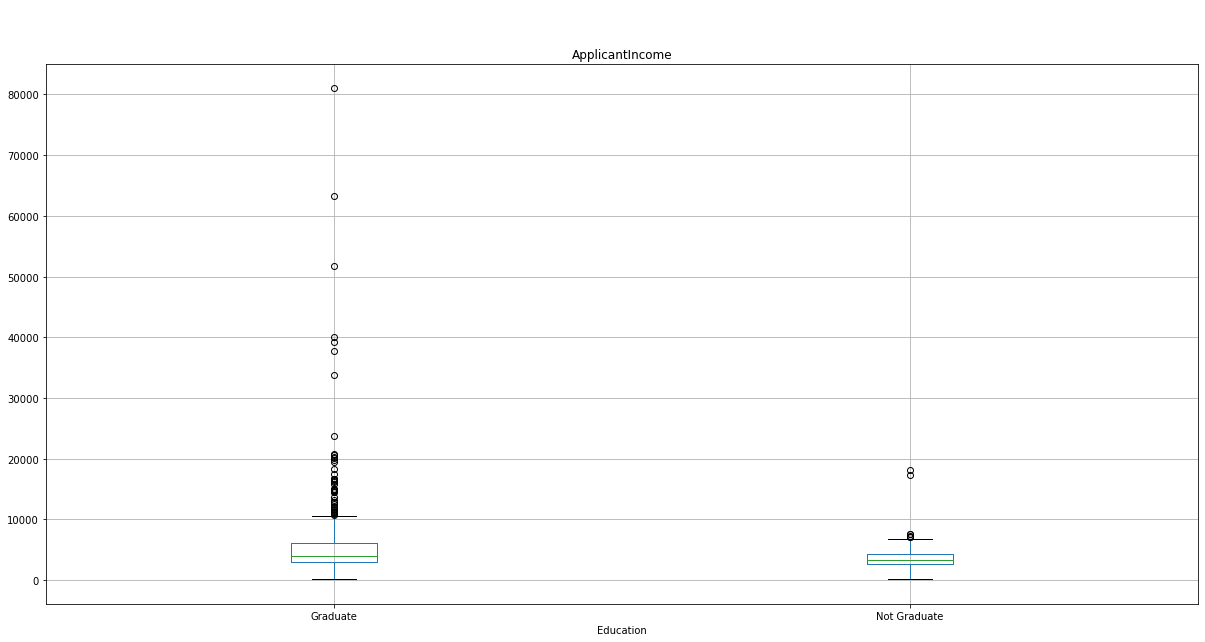

In [28]:
df.boxplot(column='ApplicantIncome',by="Education" )
plt.suptitle(" ")
plt.show()

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

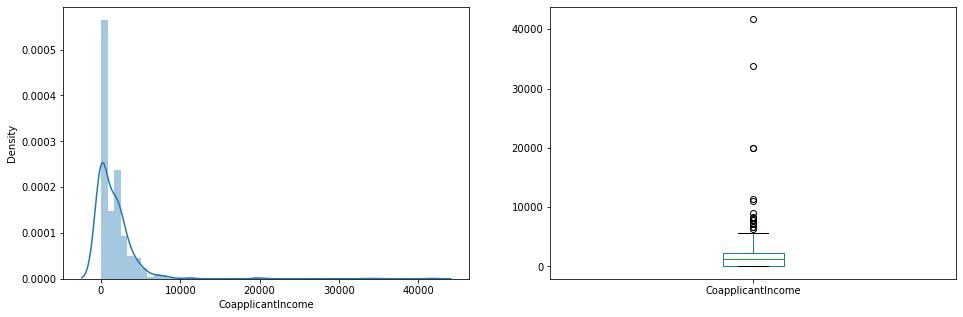

In [29]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df["CoapplicantIncome"]);

plt.subplot(122)
df["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed

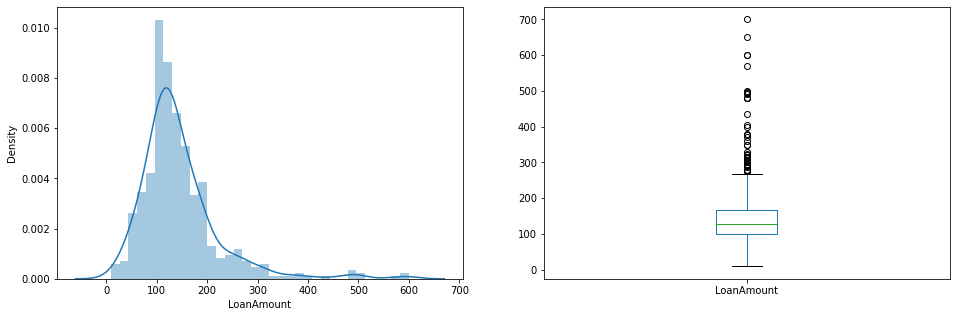

In [31]:
plt.figure(1)
plt.subplot(121)
data=df.dropna()
sns.distplot(data['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.



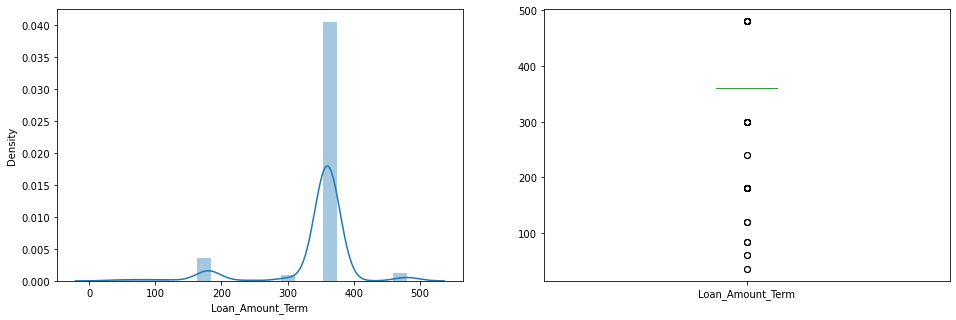

In [33]:
plt.figure(1)
plt.subplot(121)
data = df.dropna()
sns.distplot(data["Loan_Amount_Term"]);

plt.subplot(122)
data["Loan_Amount_Term"].plot.box(figsize=(16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections

Bivariate Analysis :



Lets recall some of the hypotheses that we generated earlier:

i)Applicants with high income should have more chances of loan approval.

ii)Applicants who have repaid their previous debts should have higher chances of loan approval.

iii)Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

iv)Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis.

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.






First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.



Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


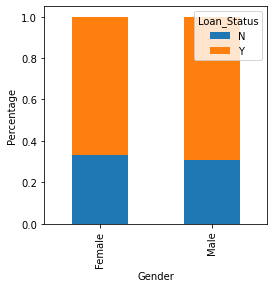

In [34]:
print(pd.crosstab(df["Gender"],df["Loan_Status"]))
Gender = pd.crosstab(df["Gender"],df["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

Number of Female whose Loan was approed : 75

Number of Male whose Loan was approed : 339

Number of Female whose Loan was not approed : 37

Number of Male whose Loan was not approed : 150

Proportion of Male applicants is higher for the approved loans.

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


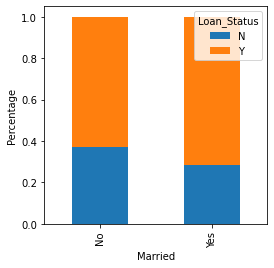

In [35]:
print(pd.crosstab(df["Married"],df["Loan_Status"]))
Married=pd.crosstab(df["Married"],df["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Married")
plt.ylabel("Percentage")
plt.show()

Number of married people whose Loan was approed : 285

Number of married people whose Loan was not approed : 113

Number of unmarried people whose Loan was approed : 134

Number of unmarried people whose Loan was not approed : 79

Proportion of Married applicants is higher for the approved loans.

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


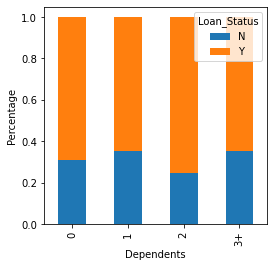

In [36]:
print(pd.crosstab(df['Dependents'],df["Loan_Status"]))
Dependents = pd.crosstab(df['Dependents'],df["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Dependents")
plt.ylabel("Percentage")
plt.show()

Number of dependents on the loan applicant : 0 and Loan was approed : 238

Number of dependents on the loan applicant : 0 and Loan was not approed : 107

Number of dependents on the loan applicant : 1 and Loan was approed : 66

Number of dependents on the loan applicant : 1 and Loan was not approed : 36

Number of dependents on the loan applicant : 2 and Loan was approed : 76

Number of dependents on the loan applicant : 2 and Loan was not approed : 25

Number of dependents on the loan applicant : 3+ and Loan was approed : 33

Number of dependents on the loan applicant : 3+ and Loan was not approed : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


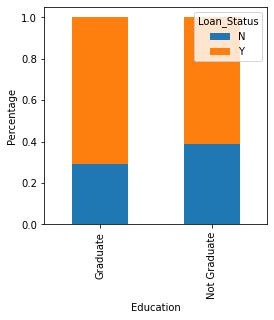

In [37]:
print(pd.crosstab(df["Education"],df["Loan_Status"]))
Education = pd.crosstab(df["Education"],df["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Education")
plt.ylabel("Percentage")
plt.show()

Number of people who are Graduate and Loan was approed : 340

Number of people who are Graduate and Loan was no approed : 140

Number of people who are Not Graduate and Loan was approed : 82

Number of people who are Not Graduate and Loan was not approed : 52

Proportion of Graduate applicants is higher for the approved loans.

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


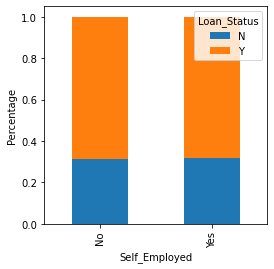

In [38]:
print(pd.crosstab(df["Self_Employed"],df["Loan_Status"]))
SelfEmployed = pd.crosstab(df["Self_Employed"],df["Loan_Status"])
SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Self_Employed")
plt.ylabel("Percentage")
plt.show()

People who are Self_Employed and Loan was approed : 56

People who are Self_Employed and Loan was not approed : 26

People who are not Self_Employed and Loan was approed : 343

People who are not Self_Employed and Loan was not approed : 157

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


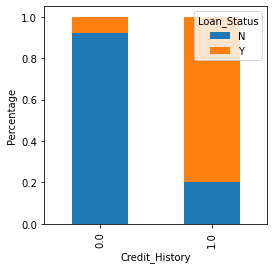

In [39]:
print(pd.crosstab(df["Credit_History"],df["Loan_Status"]))
CreditHistory = pd.crosstab(df["Credit_History"],df["Loan_Status"])
CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Credit_History")
plt.ylabel("Percentage")
plt.show()

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


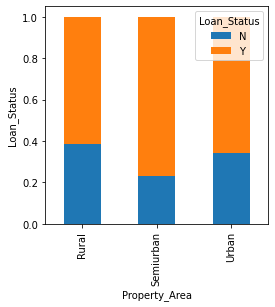

In [40]:
print(pd.crosstab(df["Property_Area"],df["Loan_Status"]))
PropertyArea = pd.crosstab(df["Property_Area"],df["Loan_Status"])
PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

People who are from Rural area and loan was approved : 110

People who are from Rural area and loan was not approved : 69

People who are from Semiurban area and loan was approved : 179

People who are from Semiurban area and loan was not approved : 54

People who are from Urban area and loan was approved : 133

People who are from Semiurban area and loan was not approved : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

<AxesSubplot:xlabel='Loan_Status'>

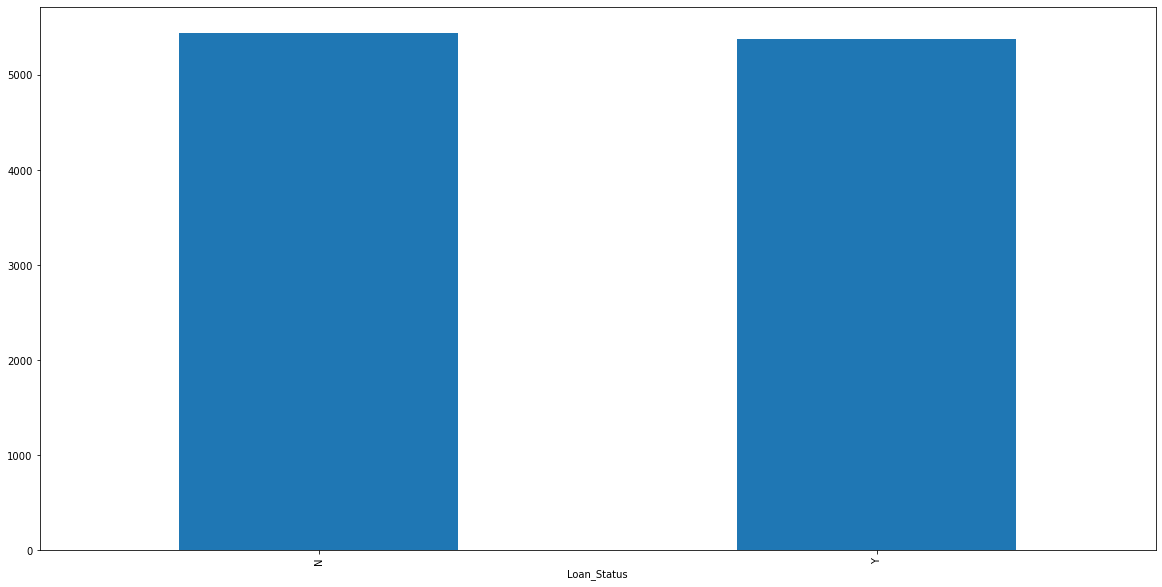

In [42]:
df.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [44]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


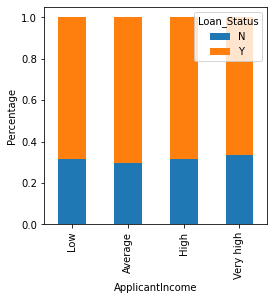

In [45]:
print(pd.crosstab(df["Income_bin"],df["Loan_Status"]))
Income_bin = pd.crosstab(df["Income_bin"],df["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar way

In [46]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
df['CoapplicantIncome_bin']=pd.cut(df["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   19
Average                61  161
High                   32   65


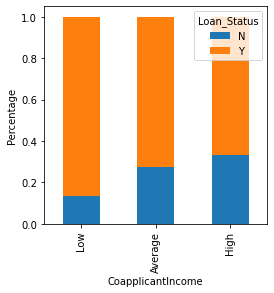

In [47]:
print(pd.crosstab(df["CoapplicantIncome_bin"],df["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(df["CoapplicantIncome_bin"],df["Loan_Status"])
CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval

In [48]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [49]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
df["TotalIncome_bin"]=pd.cut(df["TotalIncome"],bins,labels=group)


Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


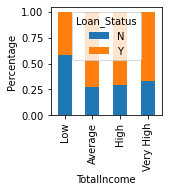

In [50]:
print(pd.crosstab(df["TotalIncome_bin"],df["Loan_Status"]))
TotalIncome = pd.crosstab(df["TotalIncome_bin"],df["Loan_Status"])
TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(2,2))
plt.xlabel("TotalIncome")
plt.ylabel("Percentage")
plt.show()

Whose TotalIncome was Low and loan was approved : 10

Whose TotalIncome was Low and loan was not approved : 14

Whose TotalIncome was Aerage and loan was apprvoed : 87

Whose TotalIncome was Average and loan was not approved : 32

Whose TotalIncome was High and loan was approved : 159

Whose TotalIncome was High and loan was not approved : 65

Whose TotalIncome was Very High and loan was approved : 166

Whose TotalIncome was Very High and loan was not approed : 81

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

In [51]:
bins = [0,100,200,700]
group=['Low','Average','High']
df["LoanAmount_bin"]=pd.cut(df["LoanAmount"],bins,labels=group)

Loan_Status       N    Y
LoanAmount_bin          
Low              47  107
Average         103  255
High             31   49


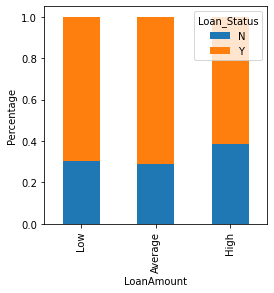

In [52]:
print(pd.crosstab(df["LoanAmount_bin"],df["Loan_Status"]))
LoanAmount=pd.crosstab(df["LoanAmount_bin"],df["Loan_Status"])
LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

Whose Loan Amount was low and Loan was approved : 86

Whose Loan Amount was low and Loan was not approved : 38

Whose Loan Amount was Average and Loan was approved : 207

Whose Loan Amount was Average and Loan was not approved : 83

Whose Loan Amount was High and Loan was approved : 39

Whose Loan Amount was High and Loan was not approved : 27

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.



In [53]:
df=df.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)


In [54]:
df['Dependents'].replace('3+',3,inplace=True)
df['Loan_Status'].replace('N', 0,inplace=True)
df['Loan_Status'].replace('Y', 1,inplace=True)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more

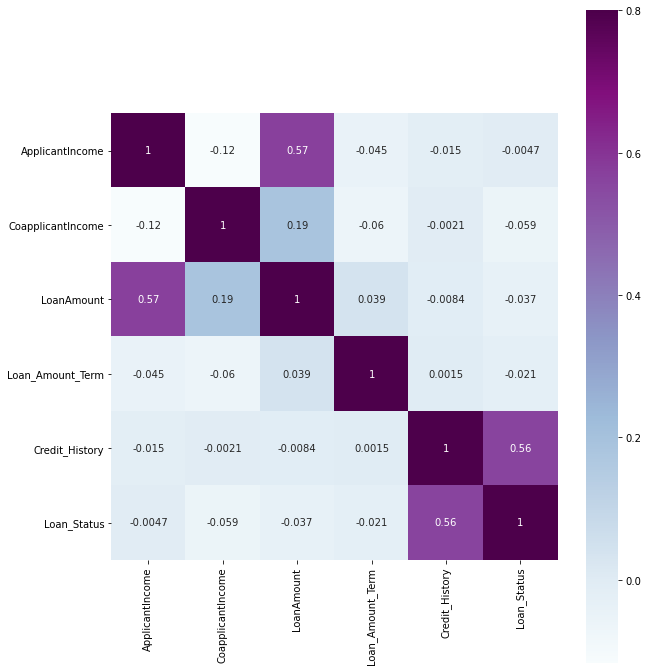

In [55]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);


We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.



Let’s list out feature-wise count of missing values.

In [57]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.



We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

    
    
    
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features

In [59]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df['Dependents'].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [60]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable

In [63]:
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [65]:
df["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values.

We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.



In [66]:
df["LoanAmount"].fillna(df["LoanAmount"].median(),inplace=True)

Now lets check whether all the missing values are filled in the dataset

In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the train dataset.

Let’s fill all the missing values in the test dataset too with the same approach

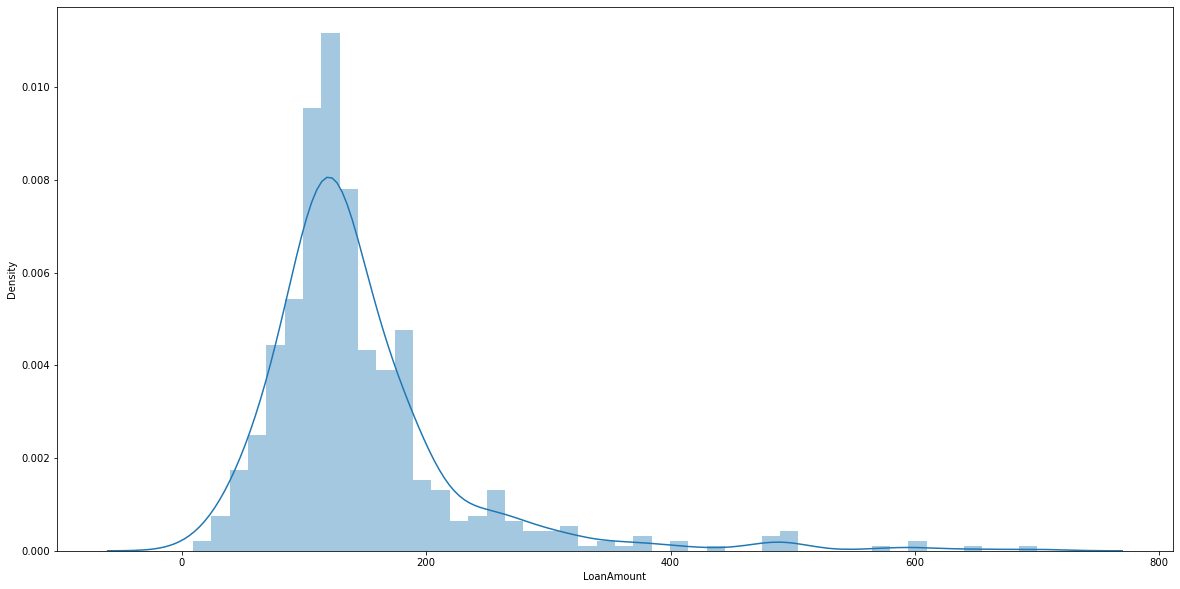

In [68]:
sns.distplot(df["LoanAmount"]);

<AxesSubplot:>

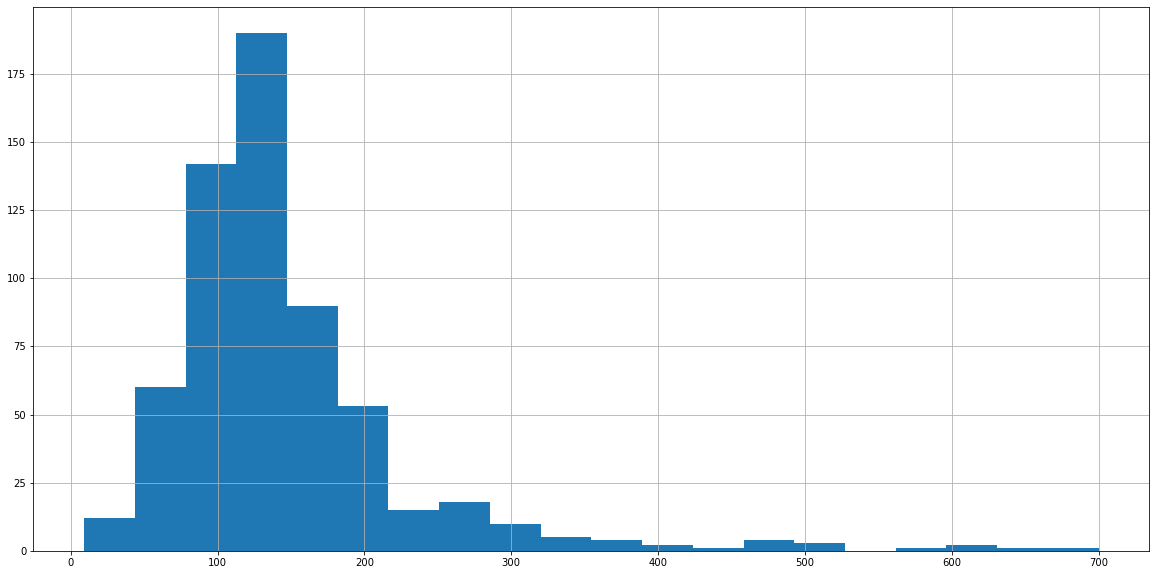

In [69]:
df['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness.

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values.

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation.

We will do the similar changes to the test file simultaneously.

<AxesSubplot:>

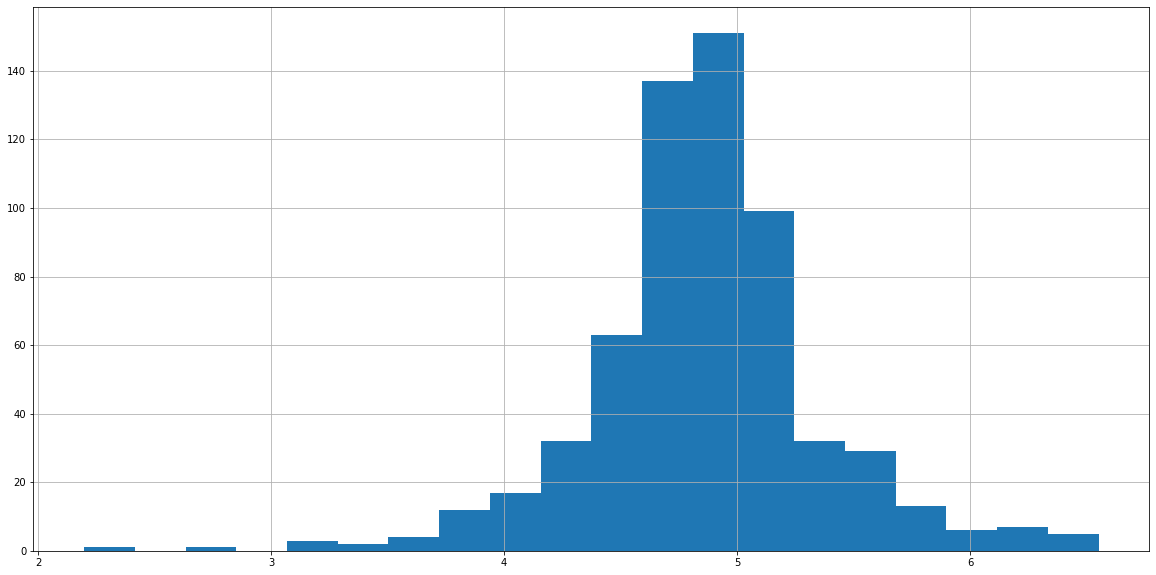

In [70]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

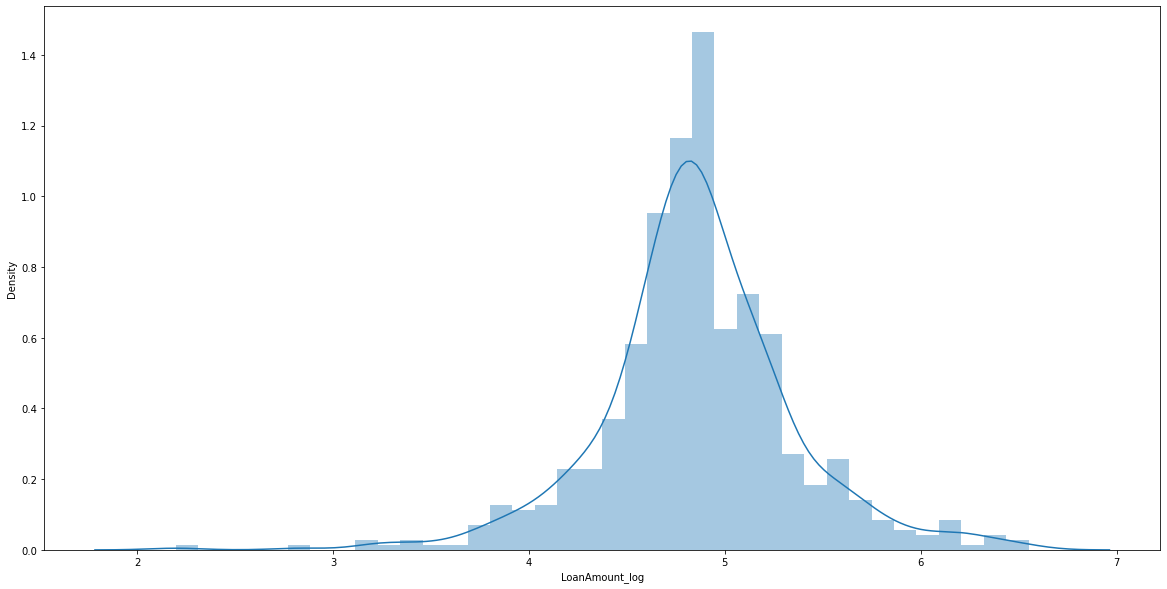

In [71]:
sns.distplot(df["LoanAmount_log"])

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [72]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

Just have a look of train dataset "TotalIncome"

In [73]:
df[["TotalIncome"]].head()

,TotalIncome
0,5849.0
1,6091.0
2,3000.0
3,4941.0
4,6000.0


Let’s check the distribution of train dataset Total Income

<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

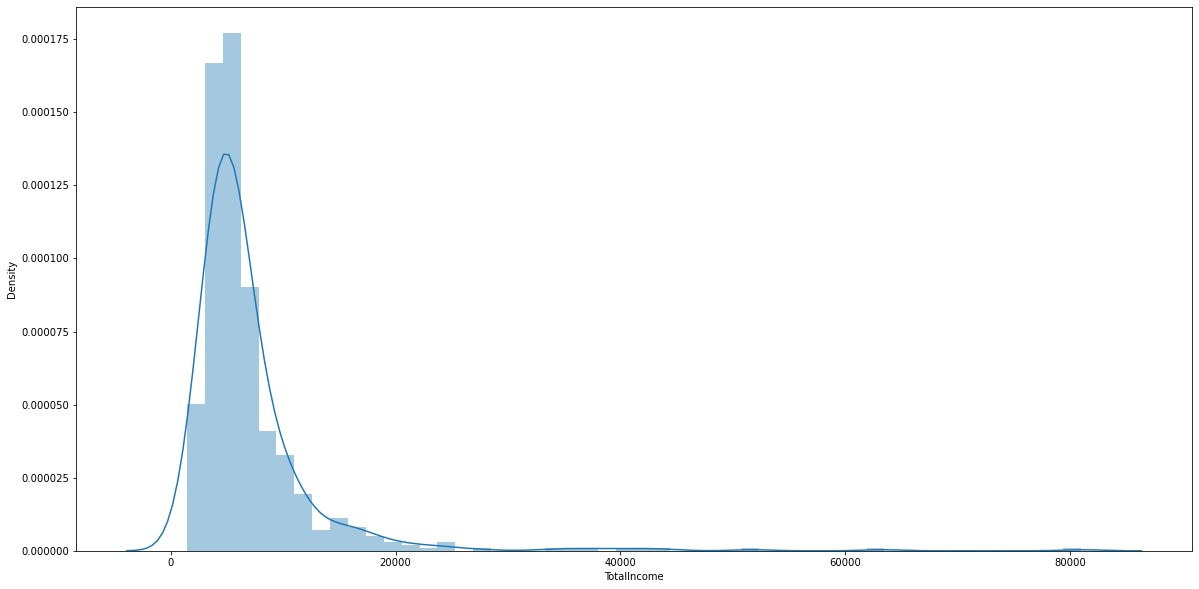

In [74]:
sns.distplot(df["TotalIncome"])

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

<AxesSubplot:xlabel='TotalIncome_log', ylabel='Density'>

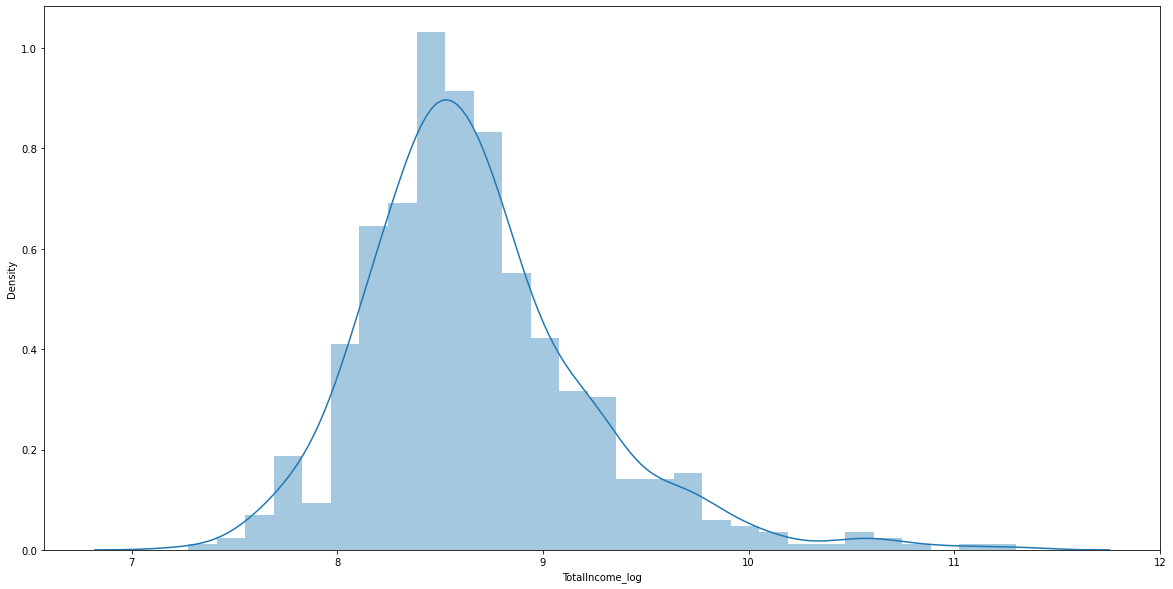

In [75]:
df["TotalIncome_log"]=np.log(df["TotalIncome"])
sns.distplot(df["TotalIncome_log"])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Now create the EMI feature.

In [76]:
df["EMI"]=df["LoanAmount"]/df["Loan_Amount_Term"]

Have a look of train dataset "EMI"

In [77]:
df[["EMI"]].head()

,EMI
0,0.355556
1,0.355556
2,0.183333
3,0.333333
4,0.391667


Let’s check the distribution of EMI variable.

<AxesSubplot:xlabel='EMI', ylabel='Density'>

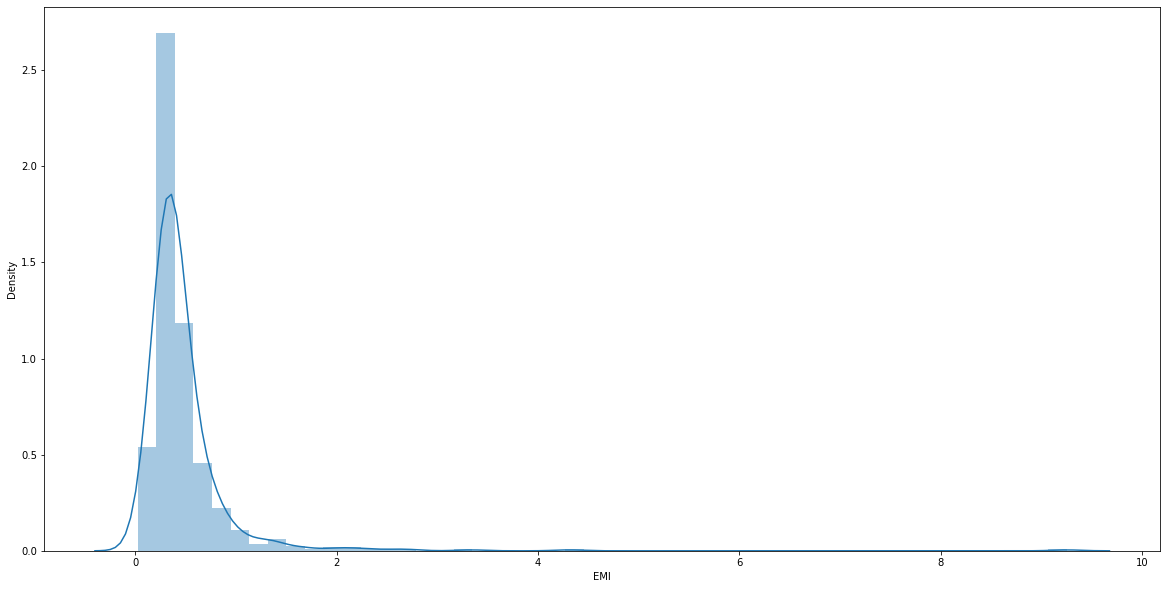

In [78]:
sns.distplot(df["EMI"])

Let's create Balance Income feature now and check its distribution.

In [79]:
df["Balance_Income"] = df["TotalIncome"]-df["EMI"]*1000 # To make the units equal we multiply with 1000

Have a look of train dataset "Balance Income"

In [80]:
df[["Balance_Income"]].head()

,Balance_Income
0,5493.444444
1,5735.444444
2,2816.666667
3,4607.666667
4,5608.333333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [81]:
df=df.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)

In [82]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over to more complex models like RandomForest

Let’s prepare the data for feeding into the models.

Let's drop the "Loan_ID" variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

Drop "Loan_ID"

In [83]:
df=df.drop("Loan_ID",axis=1)

After drop train dataset will look :


In [84]:
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667


In [87]:
#droping the target variable "Loan_Status"
X=df.drop("Loan_Status",1)
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,5849.0,8.674026,0.355556,5493.444444
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,6091.0,8.714568,0.355556,5735.444444


In [88]:
#assigning the loan status to y
y=df[["Loan_Status"]]
y.head(2)

,Loan_Status
0,1
1,0


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.

As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.

Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [89]:
X = pd.get_dummies(X)
X.head(2)

,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.85203,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,1.0,4.85203,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


In [91]:
df=pd.get_dummies(df)
df.head(2)

,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,4.85203,5849.0,8.674026,0.355556,5493.444444,0,1,1,...,1,0,0,1,0,1,0,0,0,1
1,1.0,0,4.85203,6091.0,8.714568,0.355556,5735.444444,0,1,0,...,0,1,0,1,0,1,0,1,0,0


We will use the train_test_split function from sklearn to divide our dataset. So, first let us import train_test_split.

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

The dataset has been divided into training and validation part.

70% data will use for train the model and rest of the 30% data will use for checking validation of the model.



Let's import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.



In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [95]:
logistic_model = LogisticRegression(random_state=1)

In [96]:
logistic_model.fit(x_train,y_train)

LogisticRegression(random_state=1)

Let’s predict the Loan_Status for test set

In [97]:
pred_test_logistic=logistic_model.predict(x_test)

Now calculate how accurate our predictions are by calculating the accuracy

In [100]:
score_logistic =accuracy_score(pred_test_logistic,y_test)*100 
score_logistic

75.67567567567568

So our predictions are almost 76% accurate, i.e. we have identified 76% of the loan status correctly for our logistic regression model.



Let's import Decison Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
tree_model = DecisionTreeClassifier(random_state=1)

In [103]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [104]:
pred_test_tree=tree_model.predict(x_test)

In [106]:
score_tree =accuracy_score(pred_test_tree,y_test)*100 
score_tree

71.35135135135135

our predictions are almost 71% accurate, i.e. we have identified 71% of the loan status correctly for our Decision tree model

Let's import Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)

In [109]:
forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1)

In [110]:
pred_test_forest=forest_model.predict(x_test)

In [111]:
score_forest = accuracy_score(pred_test_forest,y_test)*100
score_forest

77.83783783783784

our predictions are almost 78% accurate, i.e. we have identified 78% of the loan status correctly for our Random Forest model.

Let's import GridSearchCV

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}

In [115]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

Fit the grid search model

In [116]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [117]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

In [118]:
grid_forest_model = RandomForestClassifier(random_state=1,max_depth=7,n_estimators=41)
grid_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=41, random_state=1)

In [119]:
pred_grid_forest = grid_forest_model.predict(x_test)

In [121]:
score_grid_forest = accuracy_score(pred_grid_forest,y_test)*100
score_grid_forest

78.37837837837837

our predictions are almost 79% accurate, i.e. we have identified 79% of the loan status correctly for our Random Forest model with grid search.

Using Random Forest model we can find out most important feature among the features.

<AxesSubplot:>

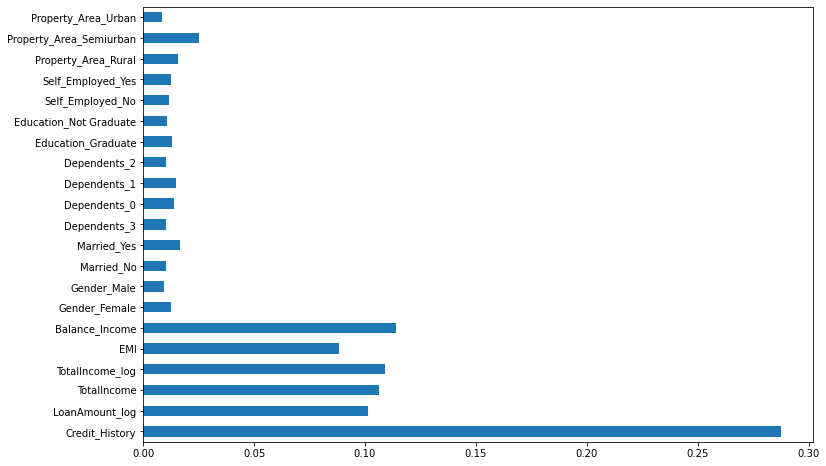

In [122]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

We can find out that 'Credit_History','Balance Income' feature are most important. So, feature engineering helped us in predicting our target variable.